imports, webdriver

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

import operator

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm
import statistics

query = input("enter search query bitch: ")
driver = webdriver.Chrome()

driver.get("https://www.ebay.com/")

elem = driver.find_element(By.XPATH, '//*[@id="gh-ac"]')
elem.clear()
elem.send_keys(query)
elem.send_keys(Keys.RETURN)

In [2]:
pricesList = []
namesList = []
pricesList_num = []

for _ in range(int(input("how many pages to search"))):
    raw_prices = driver.find_elements(By.CLASS_NAME, 's-item__price')
    raw_names = driver.find_elements(By.CLASS_NAME, 's-item__title')

    for element in raw_prices:
        price = element.text.replace('$', '')
        price = price.replace(',', '')
        pricesList.append(price)

        if ' to ' in price:
            #i.e. 10.00 to 20.00
            price = (float(price.split(' to ')[0]) + float(price.split(' to ')[1])) / 2
        pricesList_num.append(price)

    for element in raw_names:
        namesList.append(element.text)

    try:
        print("next page")
        time.sleep(1)
        next_button = driver.find_element(By.CLASS_NAME, "pagination__next")
        next_button.click()
        time.sleep(1)
    except:
        print("no more pages")

next page
no more pages


In [3]:
try:
    pricesList_num.remove('')
    pricesList.remove('')
    namesList.remove('')
except:
    assert True

pricesList_float = []
for item in pricesList_num:
    pricesList_float.append(round(float(item), 2))

item_name_and_price = zip(namesList, pricesList_float)

for item in item_name_and_price:
    print(item)

('Denim Jeans EVISU JEANS × Hello Kitty Collabo DENIM Pants Japan W:29 Inseam:31', 550.0)
('Denim Jeans EVISU DONNA JEANS × Hello Kitty Collabo DENIM Japan W:28 Inseam:29', 395.0)
('Denim Jeans EVISU DONNA JEANS × Hello Kitty Collabo DENIM Japan W:26 Inseam:28', 200.0)
('EVISU DONNA JEANS × Hello Kitty Collaboration Denim Jeans Size 26 RARE', 190.0)
('EVISU x Hello Kitty Collaboration Denim Jeans Pants Selvedge No2 2001 30x34 NEW', 500.0)
('Evisu Donna Hello Kitty Sanrio Collabo Denim Jeans Size M Skinny Denim Rare', 239.4)
('EVISU x Hello Kitty Collaboration Denim Jeans Pants Selvedge No2 2001 38x35', 499.99)
('EVISU DONNA JEANS × Hello Kitty Collaboration Denim Jeans Size 26 RARE', 188.0)
('evisu jeans hello kitty', 259.73)
('Evisu Hello Kitty collaboration embroidery jeans LOT.2001 33×35 Indigo blue', 465.99)
('EVISU DONNA SANRIO HELLO KITTY Collaboration DENIM Jeans 29 Size', 259.25)
('evisu x hello kitty Tee Shirt Size 30 Size XXs - Xs', 265.0)
('Japanese Fabrics EVISU Jeans Hello

In [8]:
sorted_list = sorted(zip(namesList, pricesList_float), key=operator.itemgetter(1))

for item in sorted_list:
    print(item)

('HELLO KITTY Sanrio Lot', 0.99)
('HELLO KITTY Sanrio Lot', 0.99)
('hello kitty X Care Bear', 1.25)
('Hello Kitty Lot Bundle', 2.0)
('Sanrio Hello Kitty Kenya Figurine', 4.99)
('Hello Kitty Cotton Candy Maker Machine Sanrio 2012 Sakar Pink', 5.0)
('Vintage Hello Kitty Plastic Handled Box With Lid', 5.0)
('hello kitty coffeee mug cups', 10.0)
('Shein X Hello Kitty Yellow Pink Blue Jeans Size Small NWT', 15.0)
('Hello Kitty Photo Frame 2002 Sanrio Co.', 15.0)
('SUPER DELUXE *HELLO KITTY* VALENTINE"S DAY GIFT BASKET FOR GIRLS READY TO SHIP!', 15.99)
('Hello Kitty Sanrio Lot', 17.5)
('SHEIN Hello Kitty & Friends, Size Small Straight Leg Jeans', 25.0)
('Funko Pop Hello Kitty Team USA series', 27.0)
('Calzedonia Hello Kitty Jeans Size Medium', 30.0)
('Hello Kitty Volcano Motion Lamp', 30.99)
('Hello Kitty Sanrio Phone', 39.99)
('Hello Kitty Bundle', 40.0)
('Hello Kitty Blanket', 45.0)
('Hello Kitty And Friends Mom Jeans', 45.0)
('NWT Hello Kitty Pink Bow Fluffy Lamp Plug In W Cord', 45.0)
('

In [5]:
n = 0
for item in pricesList_float:
    if isinstance(item, float) == True:
        n += 1
    if n == len (pricesList_float):
        print(f"OK, {n}")

OK, 68


outlier of price 1150.0


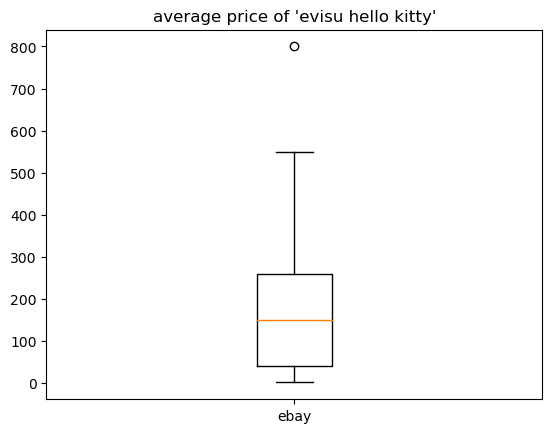

median: 150.0, mean: 191.69029411764706


In [6]:
sd = statistics.stdev(pricesList_float)
mean = statistics.mean(pricesList_float)
median = statistics.median(pricesList_float)

prices_no_outliers = []

for price in pricesList_float:
    if price > 5 * sd:
        print(f"outlier of price {price}")
    else:
        prices_no_outliers.append(price)
        

plt.boxplot(prices_no_outliers)
plt.title("average price of '" + query + "'")
plt.xticks([1], ['ebay'])
plt.show()

print(f"median: {median}, mean: {mean}")